In [ ]:
# Bruno Gomes Coelho - 9791160

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 50)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

# Exercício: Leia os dados novamente, faça a limpeza e remova as duas últimas colunas.


In [2]:
df = pd.read_csv("iris-with-errors.csv")

In [3]:
df.replace('?', np.nan, inplace=True)

In [4]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [6]:
df = df.iloc[:, :-2]
df.head()



- - - 

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# Exercício: Leia os dados novamente e insira a mediana de cada atributo onde for encontrada as NaN.


In [45]:
df = pd.read_csv("iris-with-errors.csv")

In [46]:
df.replace('?', np.nan, inplace=True)

In [4]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [47]:
for col in df.columns[:-1]:
    df[col] = df[col].astype(float)
    if df[col].dtype != "object":
        is_na = df[col].isna()
        median = df[col].median()
        df[is_na] = median
df.isna().sum() 

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [11]:
df.dtypes

sepal_length     object
sepal_width      object
petal_length    float64
petal_width      object
species          object
dtype: object



- - - 

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# Exercício: Mostre a distribuição de cada uma das variáveis após a normalização.¶


In [15]:
df.dtypes

sepal_length     object
sepal_width      object
petal_length    float64
petal_width      object
species          object
dtype: object

In [18]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

/home/bcoelho/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


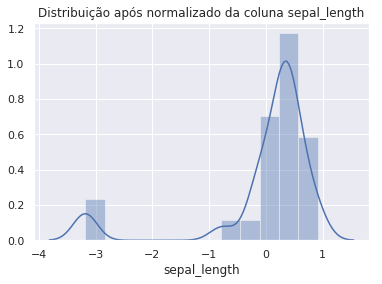

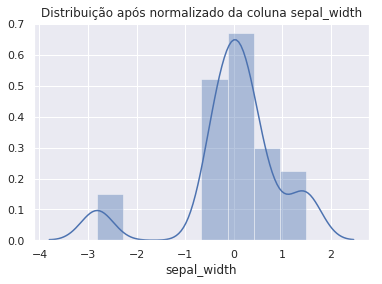

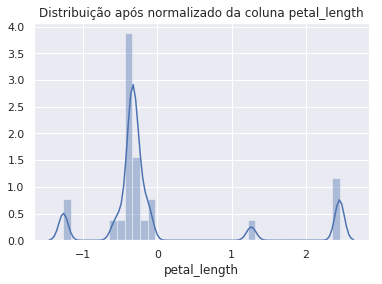

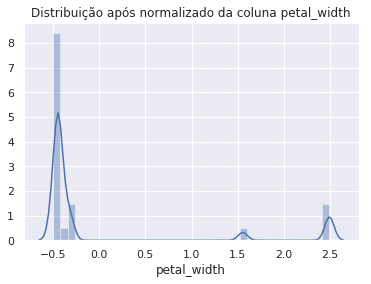

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_rescaled = scaler.fit_transform(df.drop(columns="species"))
df_rescaled = pd.DataFrame(df_rescaled, columns=df.columns[:-1])

for col in df_rescaled.columns:
    sns.distplot(df_rescaled[col])
    plt.title(f"Distribuição após normalizado da coluna {col}")
    plt.show()

Percebemos que tirando os outliers, os dados seguem uma distribuição aproximadamente normal em torno do 0, com desvio padrão 1



- - - 

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# Exercício: Mostre em um gráfico o número elementos iguais a um no vetor de atributos em função do limiar.


In [49]:
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X_pad = scaler.fit_transform(df.drop(columns="species"))
amount = []
thresholds = [x/10 for x in range(1, 11)]

for threshold in thresholds:
    binarizer = Binarizer(threshold=threshold).fit(X_pad)
    binaryX = binarizer.transform(X_pad)
    for i in np.arange(0,X_pad.shape[0]):
        #print("Antes:", X_pad[i,])
        #print('Depois:',binaryX[i,])
        #print('---------------------')
        pass
    amount.append((binaryX == 1).sum())

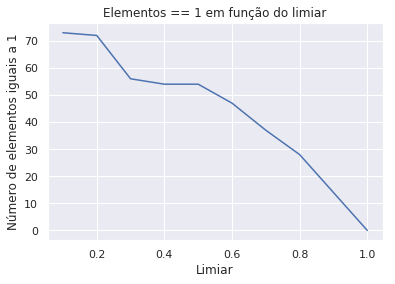

In [50]:
sns.lineplot(x=thresholds, y=amount)
plt.ylabel("Número de elementos iguais a 1")
plt.xlabel("Limiar")
plt.title("Elementos == 1 em função do limiar");



- - - 

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

#  Exercício: Reamostre os dados da Iris e selecione 10 elementos em cada classe.¶


In [52]:
df = pd.read_csv("iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [53]:
all_dfs = []
for y_value in df["species"].unique():
    idx = df["species"] == y_value
    all_dfs.append(df[idx].sample(n=10))

In [55]:
for temp_df in all_dfs:
    print(temp_df.head(10))
    print("\n\n")

    sepal_length  sepal_width  petal_length  petal_width species
22           4.6          3.6           1.0          0.2  setosa
25           5.0          3.0           1.6          0.2  setosa
48           5.3          3.7           1.5          0.2  setosa
20           5.4          3.4           1.7          0.2  setosa
13           4.3          3.0           1.1          0.1  setosa
26           5.0          3.4           1.6          0.4  setosa
43           5.0          3.5           1.6          0.6  setosa
40           5.0          3.5           1.3          0.3  setosa
46           5.1          3.8           1.6          0.2  setosa
4            5.0          3.6           1.4          0.2  setosa



    sepal_length  sepal_width  petal_length  petal_width     species
92           5.8          2.6           4.0          1.2  versicolor
65           6.7          3.1           4.4          1.4  versicolor
84           5.4          3.0           4.5          1.5  versicolor
88    



- - - 

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# Exercício: Monte um boxplot para as demais variáveis dos dados da Iris.


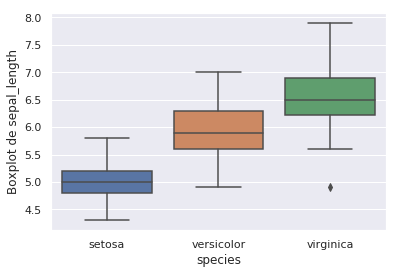

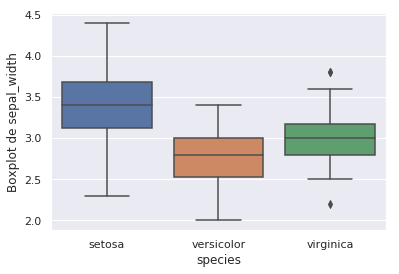

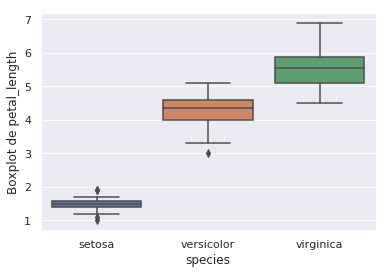

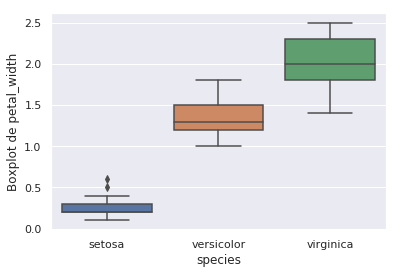

In [57]:
for col in df.columns[:-1]:
    sns.boxplot(x="species", y=col, data=df)
    plt.ylabel(f"Boxplot de {col}")
    plt.show()



- - - 

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# Exercício: Encontre os outliers nos dados da Iris e Boston.¶


In [62]:
def find_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    return (((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1))


In [63]:
# Iris
df = pd.read_csv("iris.csv")
outliers = find_outliers(df.drop(columns="species"))
print(f"Amount of outliers: {sum(outliers)}")

Amount of outliers:4


In [64]:
outliers

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15      True
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
120    False
121    False
122    False
123    False
124    False
125    False
126    False
127    False
128    False
129    False
130    False
131    False
132    False
133    False
134    False
135    False
136    False
137    False
138    False
139    False
140    False
141    False
142    False
143    False
144    False
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

In [66]:
print("\n\n\n\n\n\n")

In [70]:
# Boston
df = pd.read_csv("BostonHousing.csv")
outliers = find_outliers(df)
print(f"Amount of outliers: {sum(outliers)}")

Amount of outliers: 238


In [71]:
outliers

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18      True
19     False
20     False
21     False
22     False
23     False
24     False
25      True
26     False
27      True
28     False
29     False
       ...  
476    False
477     True
478     True
479     True
480    False
481    False
482    False
483    False
484    False
485    False
486    False
487    False
488    False
489     True
490     True
491    False
492    False
493    False
494    False
495    False
496    False
497    False
498    False
499    False
500    False
501    False
502    False
503    False
504    False
505    False
Length: 506, dtype: bool